In [3]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_mldata
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, confusion_matrix
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict

In [4]:
mnist = fetch_mldata("MNIST original")
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([0., 0., 0., ..., 9., 9., 9.])}

In [5]:
X, y = mnist["data"], mnist["target"]
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


5.0


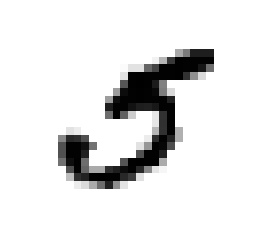

In [6]:
index = 36000
digit = X[index]
d = digit.reshape(28,28)
plt.imshow(d, cmap=matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")
print y[index]
plt.show()

<p>MNIST dataset is already splot by a training set (first 60,000) and a test set (last 10,000)</p>

In [7]:
X_train, y_train, X_test, y_test = X[:60000], y[:60000], X[60000:], y[60000:]
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]
print(X_train.shape)

(60000, 784)


In [8]:
rand_for = RandomForestClassifier(random_state=42)
rand_for.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [9]:
rand_for.predict_proba([X[index]])

array([[0. , 0. , 0. , 0. , 0. , 0.9, 0. , 0.1, 0. , 0. ]])

In [10]:
cross_val_score(rand_for, X_train, y_train, cv=3, scoring="accuracy")

array([0.93991202, 0.93984699, 0.94409161])

In [11]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(rand_for, X_train_scaled, y_train,cv=3)

array([0.94021196, 0.93974699, 0.94419163])

In [12]:
y_train_prediction = cross_val_predict(rand_for, X_train_scaled, y_train, cv=3)
conf_matrix = confusion_matrix(y_train, y_train_prediction)

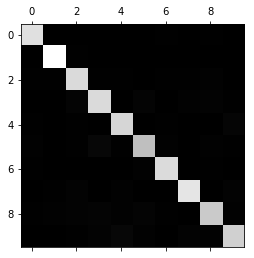

In [13]:
plt.matshow(conf_matrix, cmap=plt.cm.gray)
plt.show()